In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.cluster import KMeans
import datetime

def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_))+1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

def plot_colors(hist, centroids):
    bar = np.zeros((50,300,3), dtype="uint8")
    startX = 0
    for (percent, color) in zip(hist, centroids):
        endX = startX + (percent*300)
        cv2.rectangle(bar, (int(startX),0), (int(endX),50), color.astype("uint8").tolist(), -1)
        startX = endX
    return bar

def image_color_cluster(image_path, k=5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0]*image.shape[1], 3))

    clt = KMeans(n_clusters=k)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    plt.imsave("c:/data/capture/thefather/processed/"+now+"_processed.png", bar)

In [2]:
import glob

files=list(glob.glob('c:/data/capture/thefather/*.png'))
files

['c:/data/capture/thefather\\03_17-34-48_screenshot.png',
 'c:/data/capture/thefather\\03_17-35-32_screenshot.png',
 'c:/data/capture/thefather\\03_17-37-50_screenshot.png',
 'c:/data/capture/thefather\\03_17-38-08_screenshot.png',
 'c:/data/capture/thefather\\03_17-38-31_screenshot.png',
 'c:/data/capture/thefather\\03_17-38-57_screenshot.png',
 'c:/data/capture/thefather\\03_17-39-11_screenshot.png',
 'c:/data/capture/thefather\\03_17-39-31_screenshot.png',
 'c:/data/capture/thefather\\03_17-39-43_screenshot.png',
 'c:/data/capture/thefather\\03_17-39-50_screenshot.png',
 'c:/data/capture/thefather\\03_17-40-06_screenshot.png',
 'c:/data/capture/thefather\\03_17-40-20_screenshot.png']

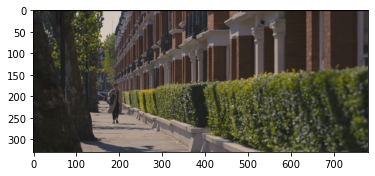

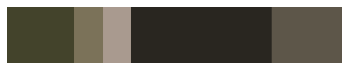

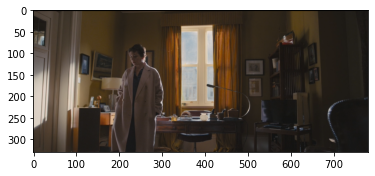

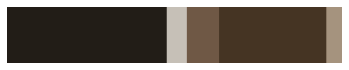

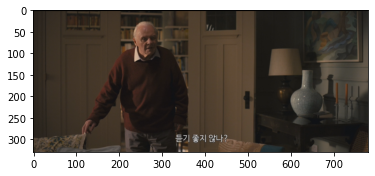

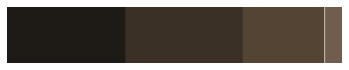

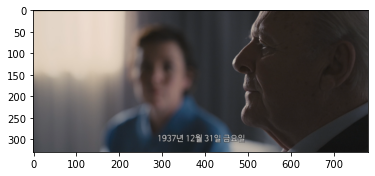

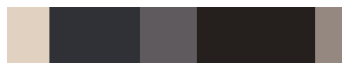

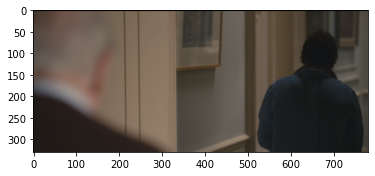

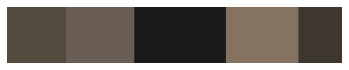

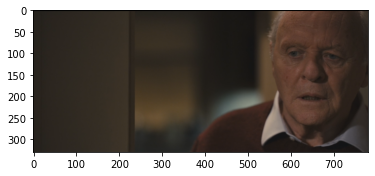

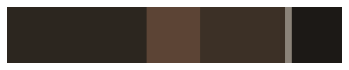

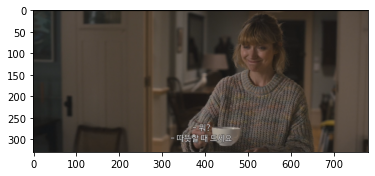

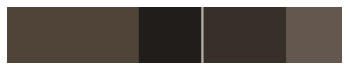

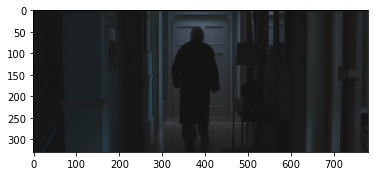

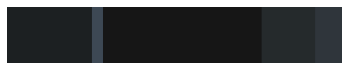

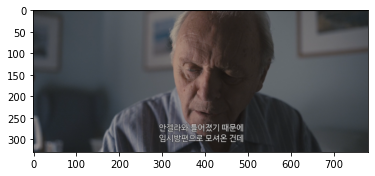

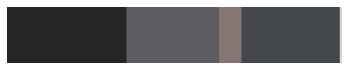

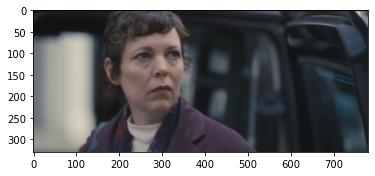

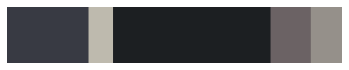

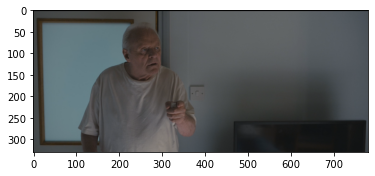

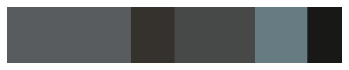

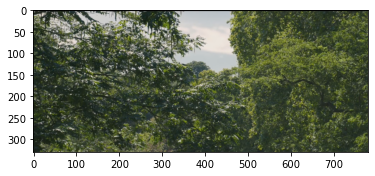

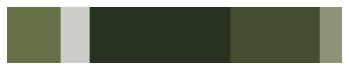

In [3]:
import datetime

for f in files:
    image = mpimg.imread(f)
    plt.imshow(image)
    image_color_cluster(f)

In [ ]:
image_path = "c:/data/capture/thefather/03_17-34-48_screenshot.png"

image = mpimg.imread(image_path)
plt.imshow(image)

image_color_cluster(image_path)

In [ ]:
def read_real_color(filename):
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_list = [str(list(image[i][k])) for i in range(len(image)) for k in range(len(image[0]))]
    image_unique = {}
    for d in image_list:
        if d not in image_unique:
            image_unique[d] = 1
        else:
            image_unique[d] += 1

    import operator
    icon_color_list = max(image_unique.items(), key=operator.itemgetter(1))[0]

    color_R = int(icon_color_list.split('[')[1].split(']')[0].split(', ')[0])
    color_G = int(icon_color_list.split('[')[1].split(']')[0].split(', ')[1])
    color_B = int(icon_color_list.split('[')[1].split(']')[0].split(', ')[2])

    color_R = dec_to_hex(color_R)
    color_G = dec_to_hex(color_G)
    color_B = dec_to_hex(color_B)

    return str(color_R + color_G + color_B)

def dec_to_hex(color):
    if color < 16:
        return '0' + str(hex(int(color)).split('x')[1])
    else:
        return str(hex(int(color)).split('x')[1])

#color_list = []
#for n in df_cafe.index:
#    png = './cafe_color_result/' + df_cafe['파일명'][n]
#    color_list.append(read_real_color(png))
#df_cafe['대표색'] = color_list

In [ ]:
color_list = []
color_list.append(read_real_color(image_path))
color_list

In [ ]:
# https://velog.io/@soryeongk/SeoulCafeColorMap

In [ ]:
# https://github.com/inyl/my_notebook/blob/master/open_cv/image_color_cluster.ipynb

In [ ]:
# https://076923.github.io/posts/Python-opencv-20/

In [ ]:
# https://www.youtube.com/watch?v=ZfoDtD9xEvw
# 화면 캡쳐 버튼 만들기

In [ ]:
import datetime
import cv2

capture = cv2.VideoCapture("c:/data/sample.MOV")
record = False

while True:
    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        capture.open("c:/data/sample.MOV")
    ret, frame = capture.read()
    cv2.imshow("VideoFrame", frame)
    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    key = cv2.waitKey(5)

    if key == 27:
        break
    elif key == 26:
        cv2.imwrite("c:/data/capture/"+str(now)+".png", frame)

capture.release()
cv2.destroyAllWindows()

In [ ]:
# https://kimflstudio.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-pyautogui-%EB%A7%A4%ED%81%AC%EB%A1%9C-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8-%EB%A7%8C%EB%93%A4%EA%B8%B0-%EC%8A%A4%ED%81%AC%EB%A6%B0%EC%83%B7-%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A1%9C-%ED%99%94%EB%A9%B4%EC%97%90%EC%84%9C-%EC%9E%90%EB%8F%99%EC%9C%BC%EB%A1%9C-%EC%A2%8C%ED%91%9C%EB%A5%BC-%EC%95%8C%EC%95%84%EB%82%B4-%EB%A7%88%EC%9A%B0%EC%8A%A4%EB%A1%9C-%ED%81%B4%EB%A6%AD%ED%95%98%EA%B2%8C-%EB%A7%8C%EB%93%9C%EB%8A%94%EB%B2%95
# 화면에서 마우스 커서의 좌표 알려주는법

In [ ]:
# 키보드 키 눌러서 함수 호출 가능??? pip install keyboard
# 가능~~~~~~~~~~~~~!!!!!!!!

import keyboard
import pyautogui
from tkinter.filedialog import *
import datetime

def s_shot():
    myScreenshot = pyautogui.screenshot(region=(0, 545, 780, 330)) # screenshot(region=(x축, y축, 가로길이, 세로길이))
    now = datetime.datetime.now().strftime("%d_%H-%M-%S")
    path = r"c:/data/capture/thefather/"+now+"_screenshot.png"
    myScreenshot.save(path)

keyboard.add_hotkey("ctrl+b", lambda: s_shot())

In [ ]:
import pyautogui

print(pyautogui.position())

In [ ]:
# 대표색을 16진수로 반환

In [ ]:
def read_real_color(filename):
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_list = [str(list(image[i][k])) for i in range(len(image)) for k in range(len(image[0]))]
    image_unique = {}
    for d in image_list:
        if d not in image_unique:
            image_unique[d] = 1
        else:
            image_unique[d] += 1

    import operator
    icon_color_list = max(image_unique.items(), key=operator.itemgetter(1))[0]

    color_R = int(icon_color_list.split('[')[1].split(']')[0].split(', ')[0])
    color_G = int(icon_color_list.split('[')[1].split(']')[0].split(', ')[1])
    color_B = int(icon_color_list.split('[')[1].split(']')[0].split(', ')[2])

    color_R = dec_to_hex(color_R)
    color_G = dec_to_hex(color_G)
    color_B = dec_to_hex(color_B)

    return str(color_R + color_G + color_B)

def dec_to_hex(color):
    if color < 16:
        return '0' + str(hex(int(color)).split('x')[1])
    else:
        return str(hex(int(color)).split('x')[1])

#color_list = []
#for n in df_cafe.index:
#    png = './cafe_color_result/' + df_cafe['파일명'][n]
#    color_list.append(read_real_color(png))
#df_cafe['대표색'] = color_list

In [ ]:
color_list = []
color_list.append(read_real_color(image_path))
color_list